![Alt text](logo_UTN.svg)

In [1]:
from DSP import *
from Plot import *
from matplotlib.pyplot import *

Transformada de Fourier Discreta (DFT)

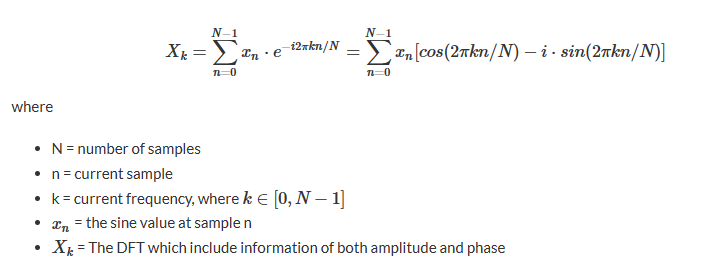

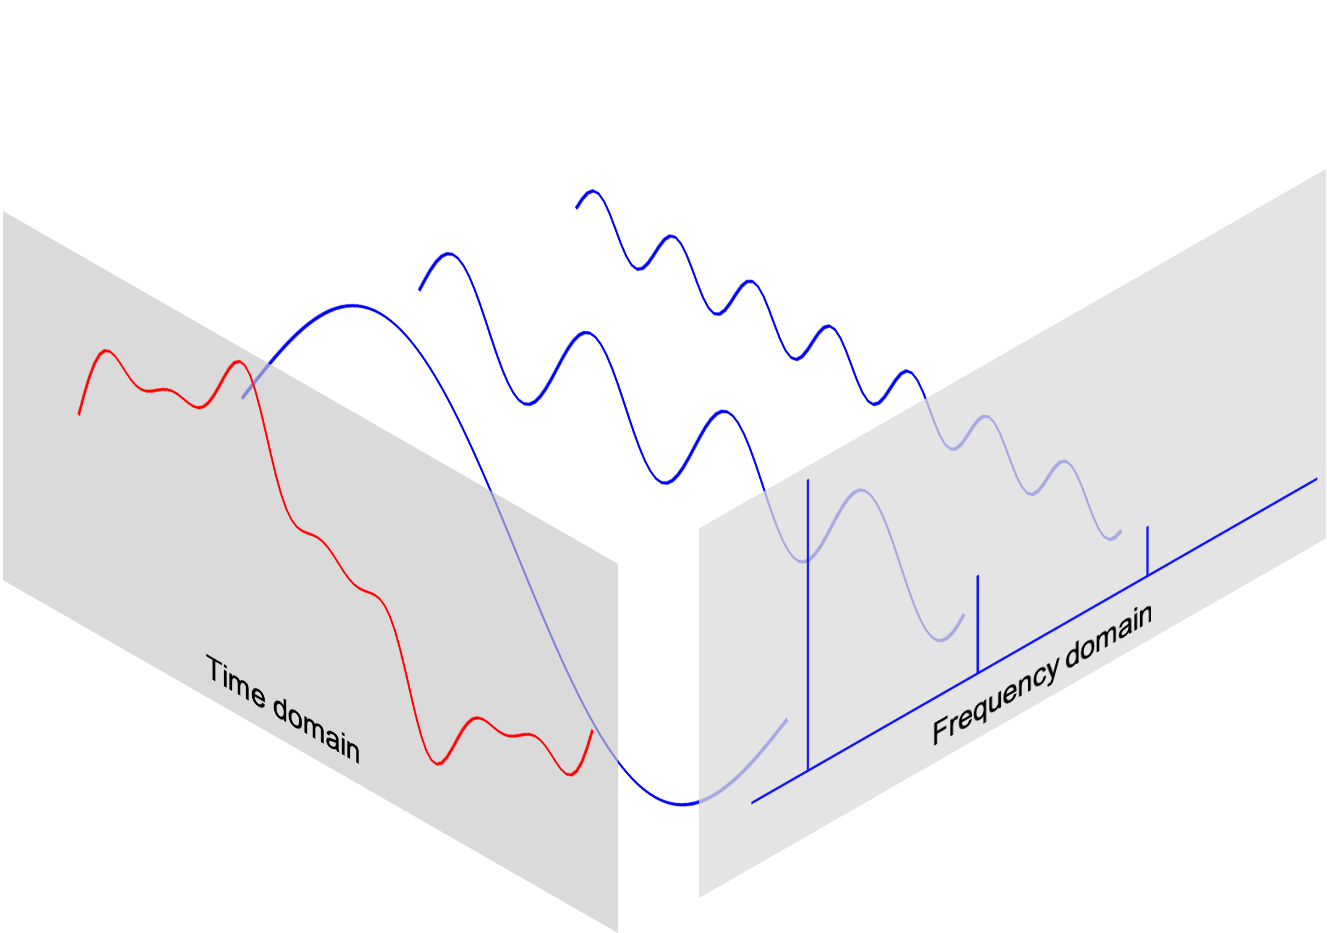

Notar como se puede optimizar computacionalmente la Transformada de Fourier. Bibliografia: Lyons

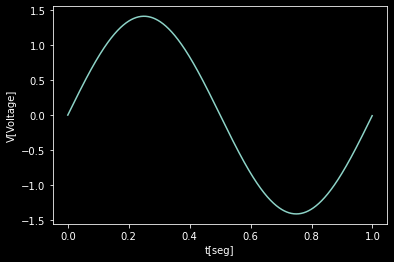

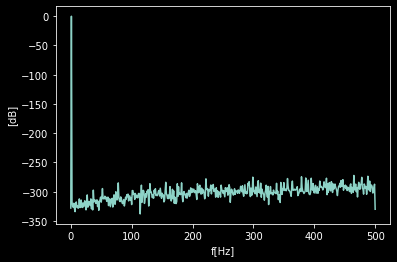

In [5]:
fs = 1000. #[Hz] Definido por ADC 
  # NOTA: usar escalares con X. para usar variables tipo enteras en procesador 
N = fs # muestras (Normalizamos para ver mejor el grafico)

A = np.sqrt(2)
tt, xx = mi_funcion_sen( vmax = A, dc = 0, ff = 1, ph=0, nn = N, fs = fs) 

X = (1/N)*fourier_transform_v1(xx)

df = fs/N 
ff = np.arange(start = 0, stop = len(xx) , step = df)
bfrec = ff <= fs/2

iplot( tt, xx,"t[seg]","V[Voltage]")
iplot( ff[bfrec], 10* np.log10(2*np.abs(X[bfrec])**2),"f[Hz]","[dB]")

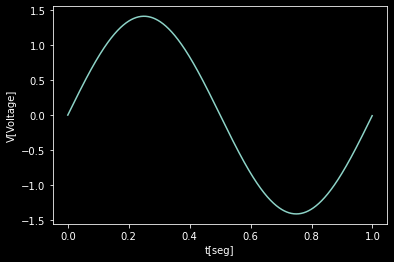

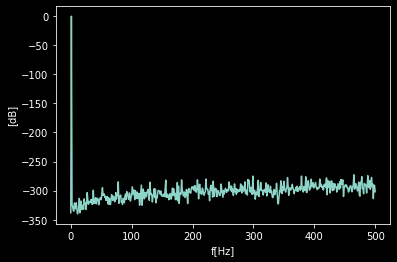

In [3]:
fs = 1000. #[Hz] Definido por ADC 
  # NOTA: usar escalares con X. para usar variables tipo enteras en procesador 
N = fs # muestras (Normalizamos para ver mejor el grafico)

A = np.sqrt(2)
tt, xx = mi_funcion_sen( vmax = A, dc = 0, ff = 1, ph=0, nn = N, fs = fs) 

X = (1/N)*DFT(xx)

df = fs/N 
ff = np.arange(start = 0, stop = len(xx) , step = df)
bfrec = ff <= fs/2

iplot( tt, xx,"t[seg]","V[Voltage]")
iplot( ff[bfrec], 10* np.log10(2*np.abs(X[bfrec])**2),"f[Hz]","[dB]")

Tecnica separando en muestras pares e impares:

From: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html

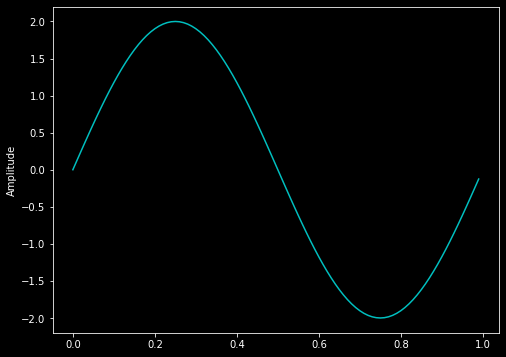

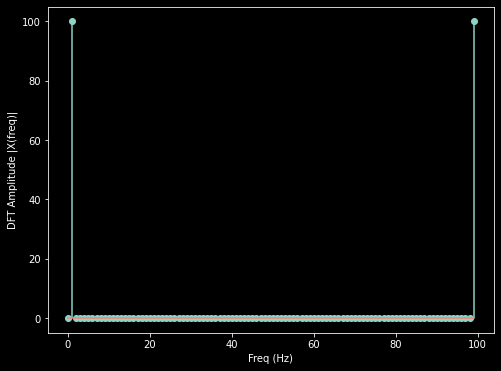

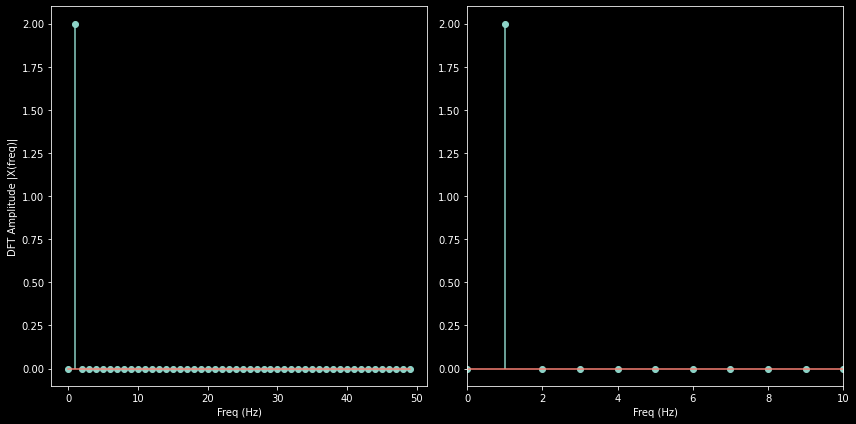

In [8]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 2*np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'c')
plt.ylabel('Amplitude')

plt.show()

def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X))
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside))
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside))
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

Al muestrear en un dominio (Tiempo), se vuelve periodico en el otro dominio (Frecuencia). Por esto, se recorta la FFT hasta fs/2 (Frecuencia Ing. Nyquist)

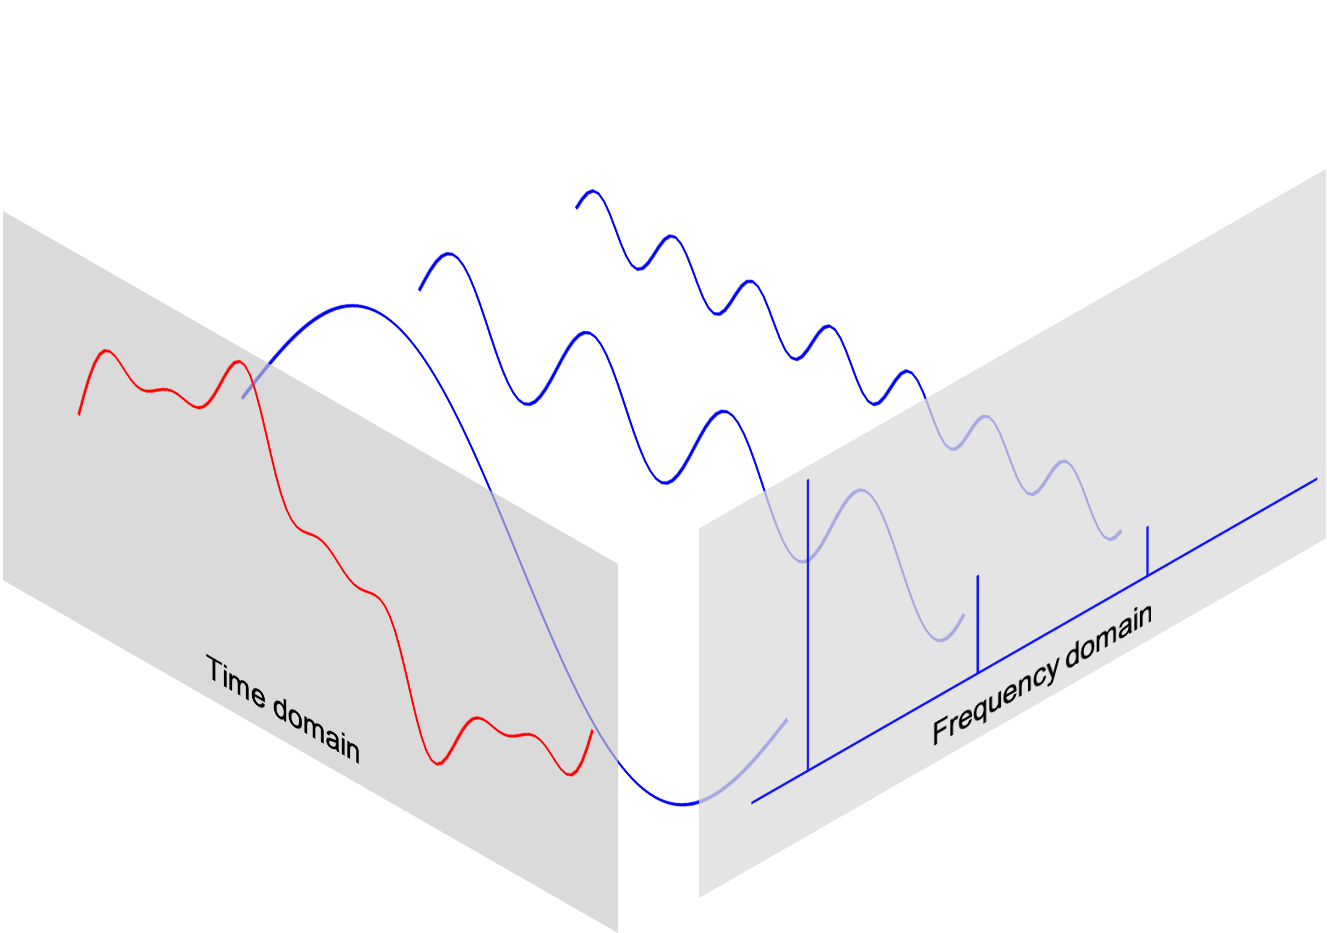